In [3]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_poisson import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


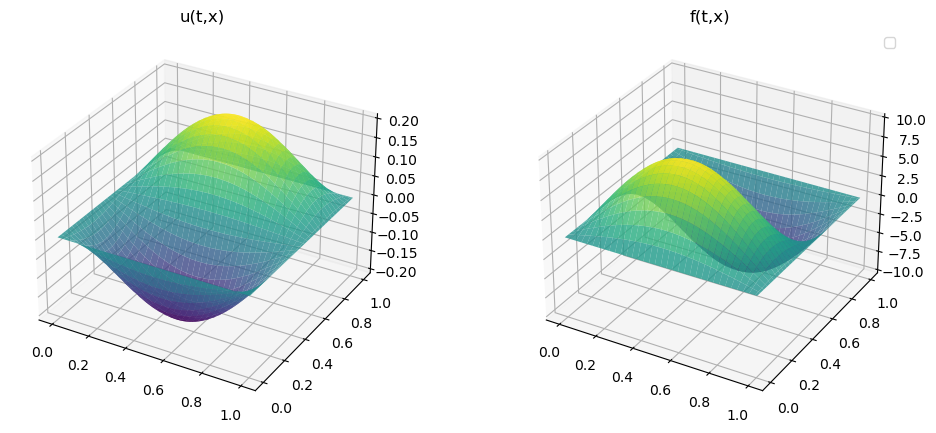

In [4]:
kernel_list = [gram_Matrix, k_uu, k_uf, k_fu, k_ff]
hyperparameters = ["l_x", "sigma_f"]
model = PhysicsInformedGP_regressor(kernel_list,timedependence=True, params = hyperparameters)
model.set_name_kernel("poisson")
n_training_points, noise_sq = 20, [1e-8,1e-8]
model.set_training_data("poisson_data.csv",n_training_points, noise_sq)
model.set_validation_data(1000)
model.plot_raw_data()

In [5]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-1.3,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((2))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lx
    theta_initial[1] = rng.uniform(0, 1, 1)               #sigma_f              
    return theta_initial
n_restarts = 3000
n_threads = 10
opt_params_dict = {'theta_initial': get_initial_values,   #needed for all optimization methods
                    'bounds': ((1e-2, None), (1e-5, None)), #needed for TNC and L-BFGS-B
                    'gtol': 1e-6}
model.train("Nelder-Mead",n_restarts, n_threads,opt_params_dict)

100%|██████████| 3000/3000 [03:05<00:00, 16.19it/s]


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -9.045125961303711
             x: [ 4.577e-01  3.514e-01]
           nit: 41
          nfev: 114
 final_simplex: (array([[ 4.577e-01,  3.514e-01],
                       [ 4.577e-01,  3.514e-01],
                       [ 4.577e-01,  3.514e-01]]), array([-9.045e+00, -9.045e+00, -9.045e+00]))


In [6]:
n_test_points = 100
x_star, t_star = np.meshgrid(np.linspace(0, 1, n_test_points), np.linspace(0, 1, n_test_points))
X_star = np.hstack((x_star.reshape(-1, 1), t_star.reshape(-1, 1)))
model.predict_model(X_star)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-----------------------------------------------
GP with kernel: 
Training data: (20, 2)
Training targets: (40, 1)
Hyperparameters: {'l_x': 0.4577354710258231, 'sigma_f': 0.35138188645362356}
Log marginal likelihood: -9.045125961303711
Mean squared error: {'u': 1.130020791606512e-06, 'f': 0.0029749437235295773}
Relative l2 error: {'u': 0.010602165753935971, 'f': 0.011017716661860442}
-----------------------------------------------



 /home/tobias/code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:678: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:687: RuntimeWarning:invalid value encountered in sqrt


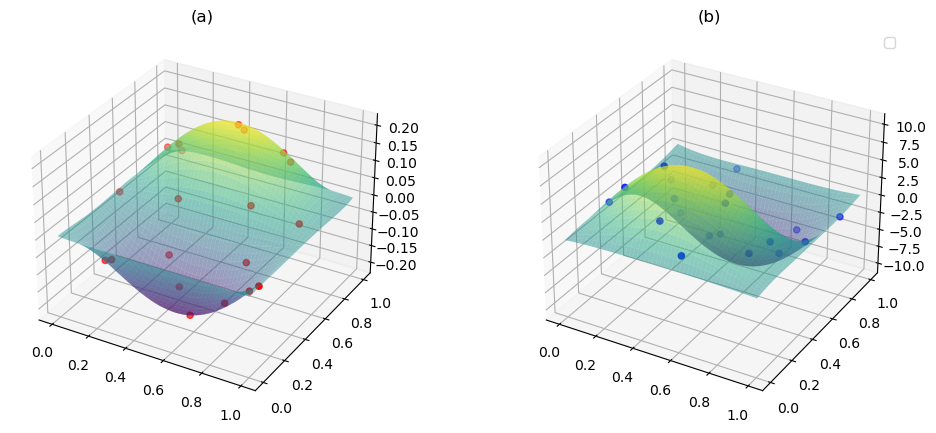

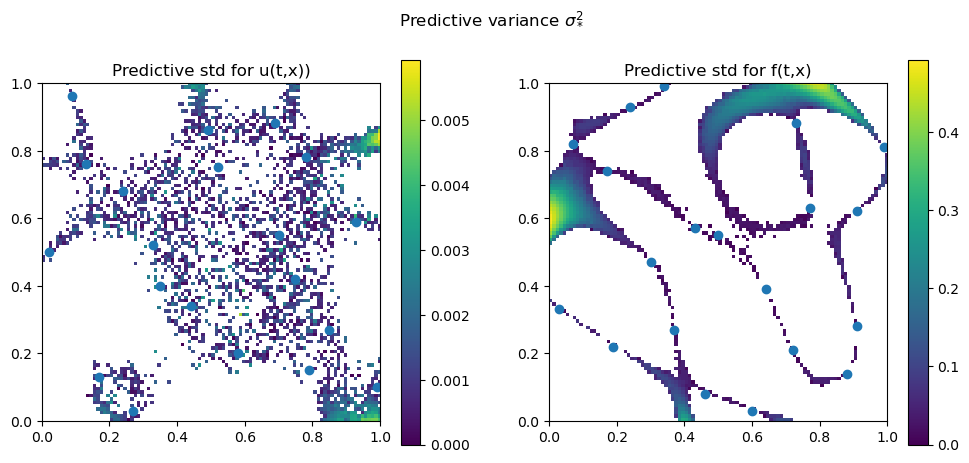

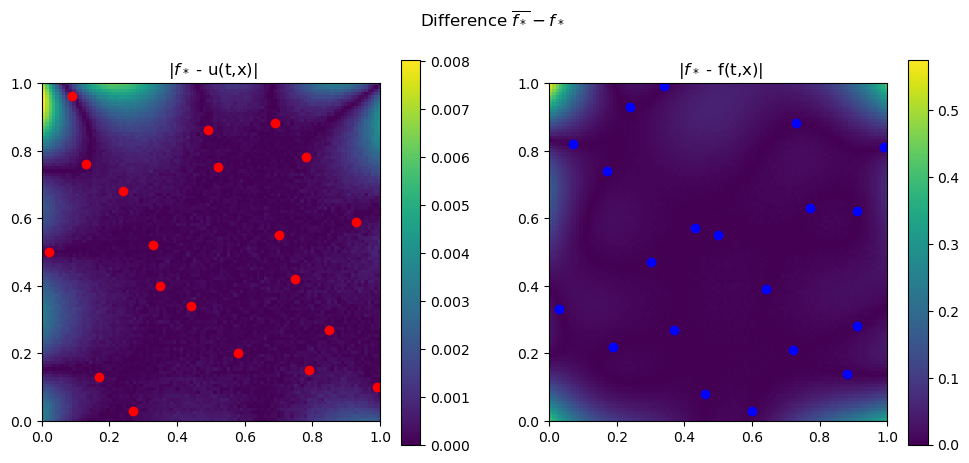

In [7]:
model.plot_prediction(X_star, "","predictive_mean.png")
model.error()
print(model)
model.plot_variance(X_star, "Predictive variance $\\sigma_*^2$", "predictive_variance.png")
model.plot_difference( "Difference $\\overline{ f_*} - f_*$", "difference.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE_u:  0.00015768078263413084
MSE_f:  0.11717839115985194
relative error u:  0.12517405101263615
relative error f:  0.06914728536165825


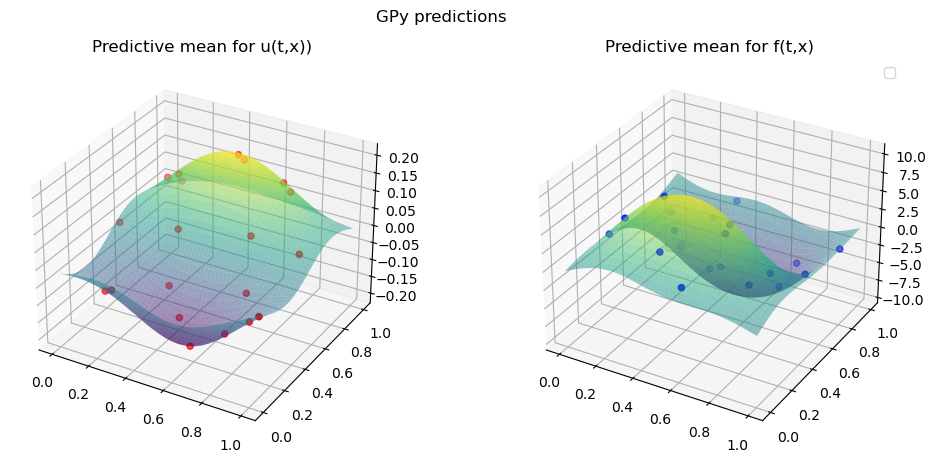

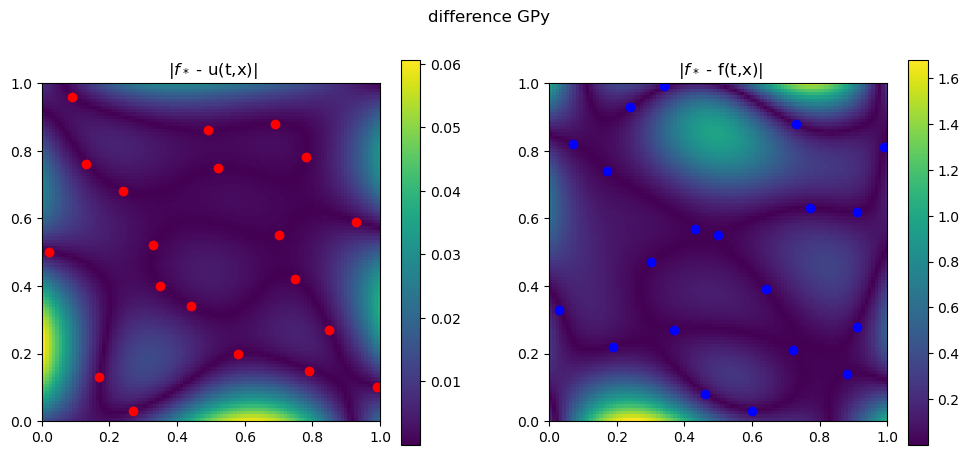

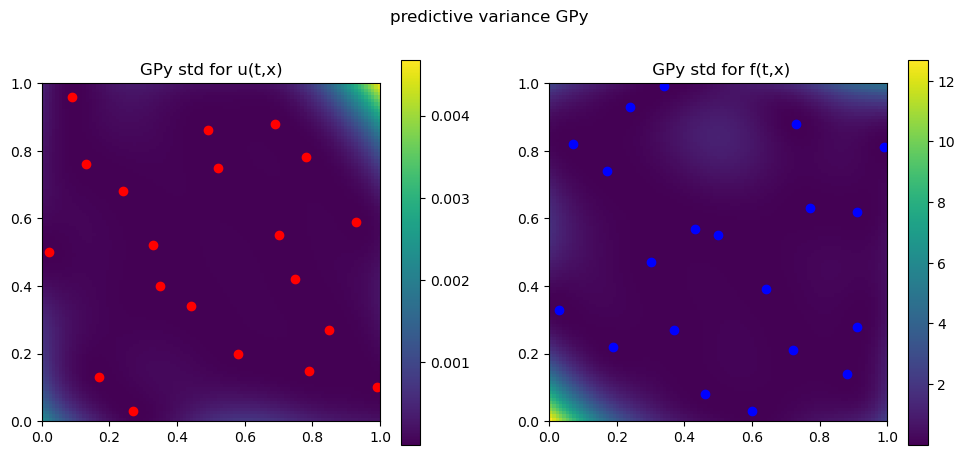

In [8]:
model.use_GPy(X_star,"gpy")
model.plot_difference_GPy("difference GPy ", "GPy_difference.png")
model.plot_variance_GPy("predictive variance GPy ", "GPy_variance.png")